In [1]:
from CartPoleContinuous import ContinuousCartPoleEnv
import numpy as np

In [2]:
env = ContinuousCartPoleEnv()
state = env.reset()
print(state)

[-0.02034118 -0.02601421 -0.0010031  -0.03378912]


/home/jdufou1/.local/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [8]:
print(env.action_space)
print(env.observation_space)

Box(-1.0, 1.0, (1,), float32)
Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


In [4]:
done = False
state = env.reset()
while not done : 
    new_state,reward,done,_ = env.step(np.array([0.5]))
    print(new_state,reward,done)
    state = new_state

[ 0.00382824  0.33195285 -0.01699854 -0.45774981] 1.0 False
[ 0.0104673   0.62486985 -0.02615354 -0.90205916] 1.0 False
[ 0.0229647   0.91789226 -0.04419472 -1.34913073] 1.0 False
[ 0.04132254  1.21108785 -0.07117733 -1.80148371] 1.0 False
[ 0.0655443   1.50445438 -0.10720701 -2.26132775] 1.0 False
[ 0.09563339  1.79788342 -0.15243356 -2.73040289] 1.0 False
[ 0.13159106  2.09111965 -0.20704162 -3.20979901] 1.0 False
[ 0.17341345  2.38371677 -0.2712376  -3.69975763] -1.0 True


In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import torch
import sys
import numpy as np

sys.path.insert(0, '../')

from utils.Tracking import Tracking




env = Tracking()
env.max_iteration = 2000
state = env.reset()
l_position = [state]
done = False

max_iter = 2000
nb_iter = 0
while not done and nb_iter < max_iter:
    new_state, reward, done = env.step([0,0])
    state = new_state
    nb_iter += 1
    l_position.append(new_state)

print(l_position[0])
list_x_target = [item[2] for item in l_position]
list_y_target = [item[3] for item in l_position]
print(nb_iter)

[5.  5.  1.  4.5]
2000


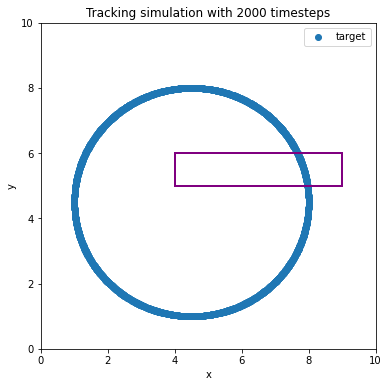

In [30]:
plt.figure(figsize=(6,6))
#plt.scatter(list_x_agent,list_y_agent , label="agent")


plt.scatter(list_x_target,list_y_target, label='target')
rect=mpatches.Rectangle((4,5),5,1, 
                            fill=False,
                            color="purple",
                           linewidth=2)
                           #facecolor="red")
plt.gca().add_patch(rect)
plt.xticks([0, 2, 4, 6, 8, 10])
plt.yticks([0, 2, 4, 6, 8, 10])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Tracking simulation with 2000 timesteps")
plt.legend()
plt.show()